# Biomedicial

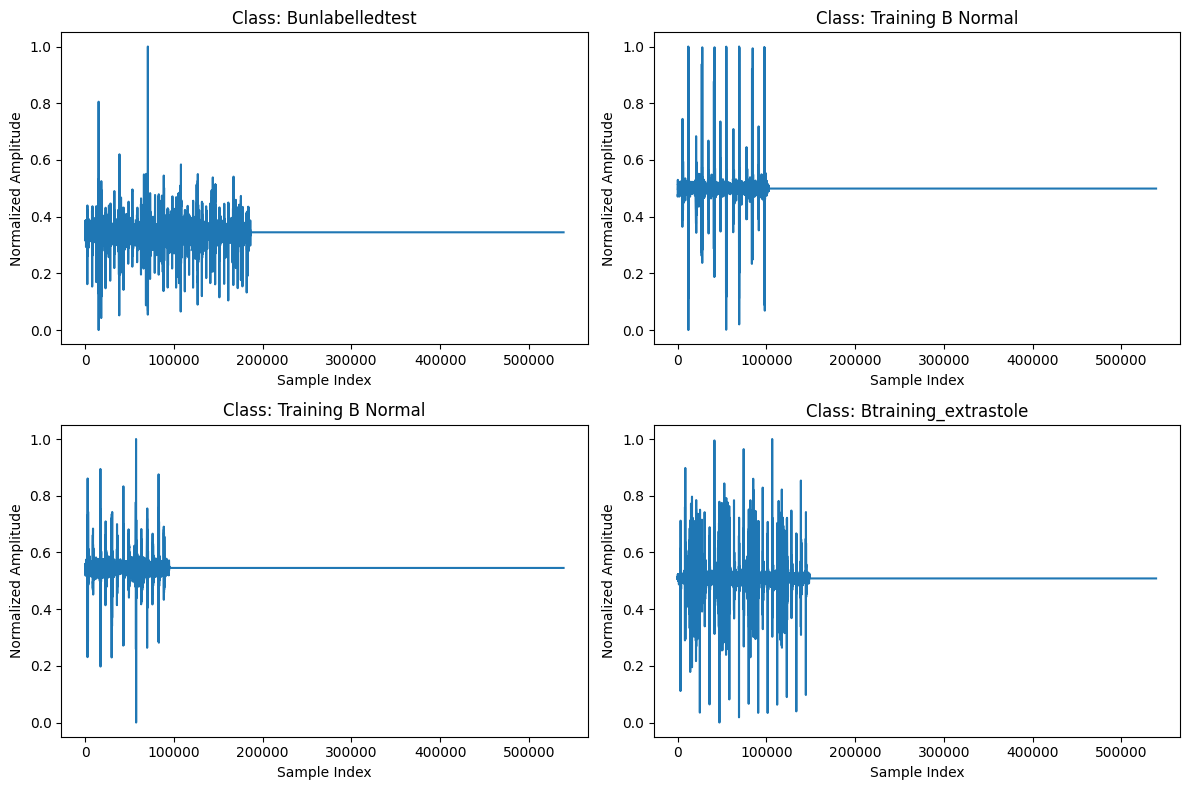

          0         1         2         3         4         5         6  \
0  0.506175  0.506066  0.506034  0.506041  0.506125  0.506224  0.506226   
1  0.521508  0.521879  0.521900  0.521785  0.521716  0.521950  0.521606   
2  0.513764  0.508600  0.510990  0.511940  0.514677  0.516584  0.515283   
3  0.547782  0.545484  0.546443  0.544580  0.546316  0.550238  0.550870   
4  0.494319  0.495040  0.499570  0.503376  0.504970  0.501841  0.500621   

          7         8         9  ...    539086    539087    539088    539089  \
0  0.506146  0.506036  0.506028  ...  0.506158  0.506158  0.506158  0.506158   
1  0.522069  0.521860  0.521535  ...  0.521842  0.521842  0.521842  0.521842   
2  0.512572  0.513687  0.513675  ...  0.512795  0.512795  0.512795  0.512795   
3  0.552719  0.553827  0.554481  ...  0.549421  0.549421  0.549421  0.549421   
4  0.500215  0.500507  0.500411  ...  0.494241  0.494241  0.494241  0.494241   

     539090    539091    539092    539093    539094               la

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import librosa
import os

DATASET_PATH = r"C:\Users\suman\Downloads\ai suman\Dataset Part 1\Heart_sount_dataset"

data = []
labels = []
sr = 22050

for dataset_name in os.listdir(DATASET_PATH):
    dataset_dir = os.path.join(DATASET_PATH, dataset_name)
    if os.path.isdir(dataset_dir):
        for class_name in os.listdir(dataset_dir):
            class_dir = os.path.join(dataset_dir, class_name)
            if os.path.isdir(class_dir):
                for fname in os.listdir(class_dir):
                    if fname.lower().endswith(".wav"):
                        fpath = os.path.join(class_dir, fname)
                        try:
                            signal, file_sr = librosa.load(fpath, sr=sr)
                            data.append(signal)
                            labels.append(class_name)
                        except Exception as e:
                            print(f"Error loading {fpath}: {e}")

if len(data) > 0:
    max_len = max(len(s) for s in data)
    padded_data = np.array([np.pad(s, (0, max_len - len(s)), 'constant') for s in data])
    df = pd.DataFrame(padded_data)
    df['label'] = labels
    scaler = MinMaxScaler()
    signal_data = df.drop('label', axis=1).values
    normalized_signal_data = scaler.fit_transform(signal_data.T).T
    df_normalized = pd.DataFrame(normalized_signal_data, columns=df.columns[:-1])
    df_normalized['label'] = labels

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()
    for i in range(4):
        row_index = np.random.randint(len(df_normalized))
        signal = df_normalized.iloc[row_index, :-1].values
        label = df_normalized.iloc[row_index, -1]
        axes[i].plot(signal)
        axes[i].set_title(f'Class: {label}')
        axes[i].set_xlabel('Sample Index')
        axes[i].set_ylabel('Normalized Amplitude')

    plt.tight_layout()
    plt.show()
    print(df_normalized.head())

# Feature extraction


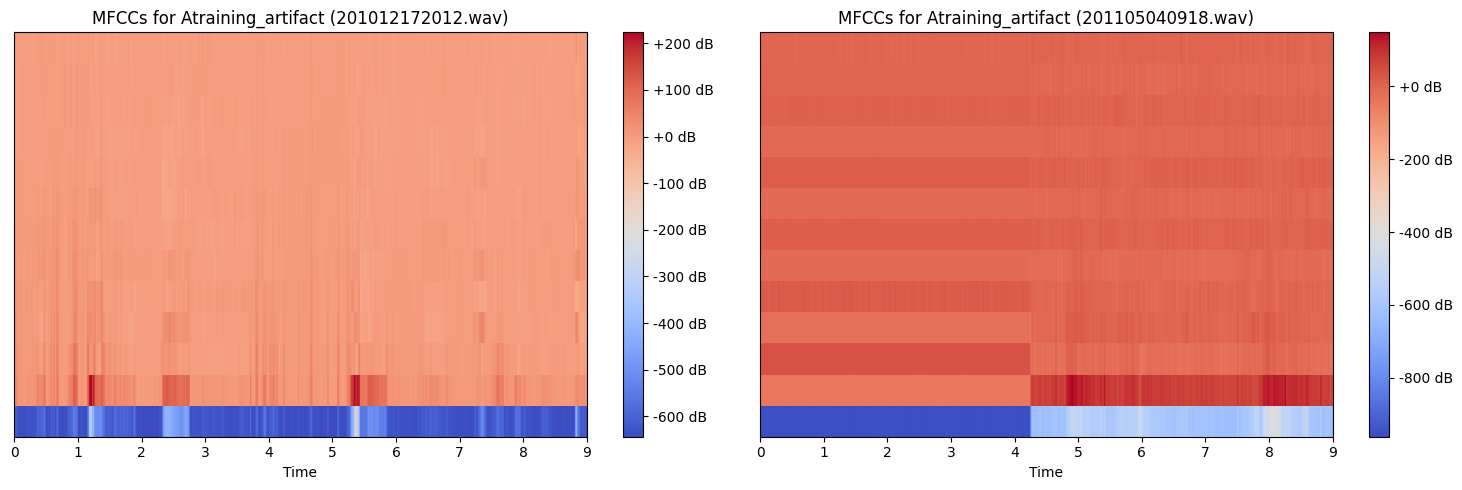

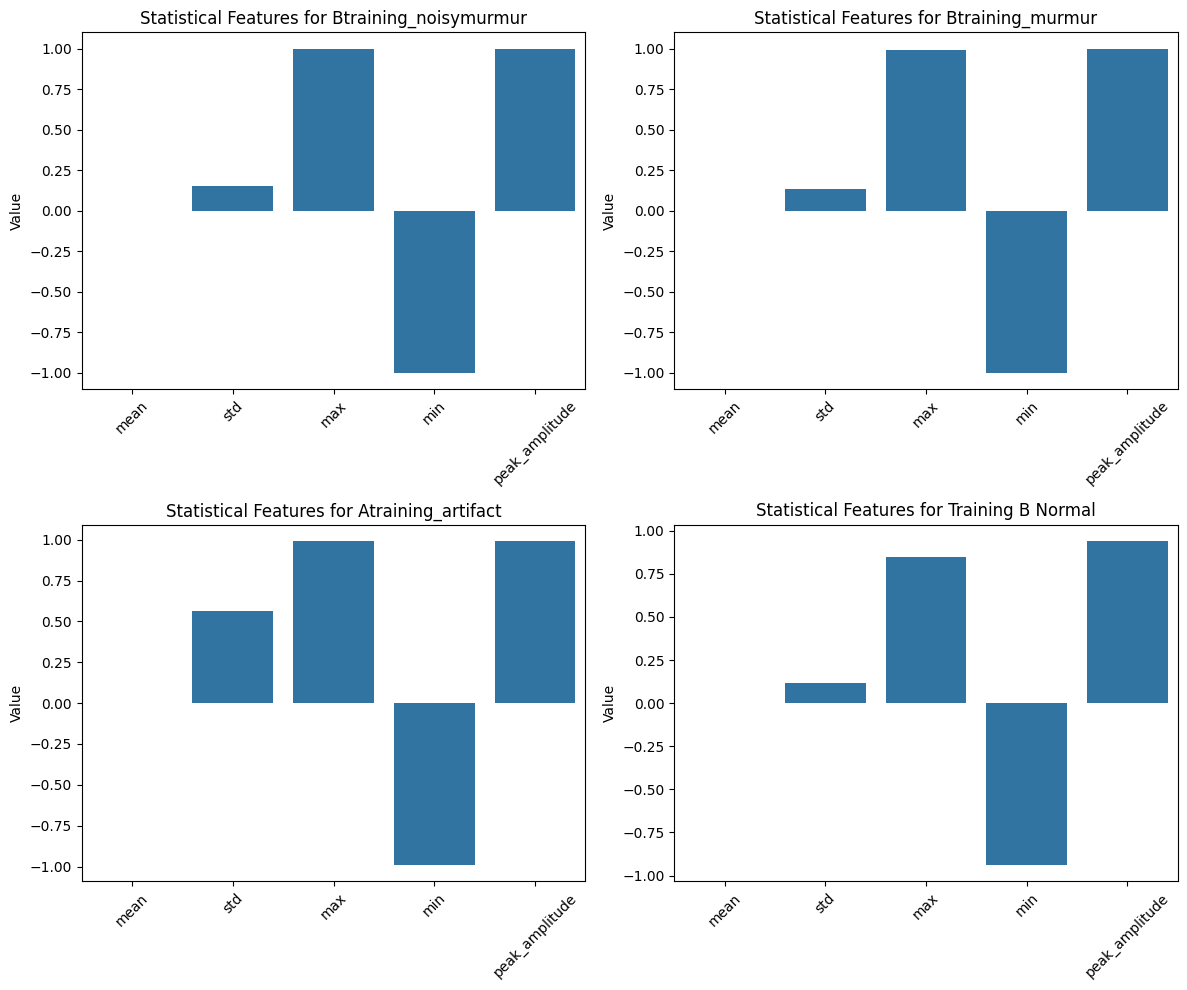

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_10,mfccs_std_11,mfccs_std_12,mean,std,max,min,peak_amplitude,label,file
0,-599.938965,33.781063,7.354340,4.549445,2.182476,2.713721,0.709749,-0.581392,-1.210531,-2.770299,...,3.829288,3.345399,3.240959,-1.046632e-05,0.014275,0.704102,-0.728973,0.728973,Atraining_artifact,201012172012.wav
1,-752.226013,23.831118,8.511935,-12.289284,6.590361,-13.384438,8.085058,-10.728707,8.733047,-9.553118,...,3.712029,4.586085,3.197184,-1.105522e-06,0.000840,0.016022,-0.018188,0.018188,Atraining_artifact,201105040918.wav
2,-587.105286,56.313488,-21.251680,5.092139,-13.107715,-3.194034,-3.268595,-9.355012,3.239805,-8.664276,...,4.714265,4.298576,4.010035,4.744103e-07,0.001050,0.020721,-0.027069,0.027069,Atraining_artifact,201105041959.wav
3,-349.670319,141.826340,-21.676260,23.579344,-2.894292,-3.926399,-8.095814,-8.885119,-7.692840,-5.413455,...,6.136240,6.389709,5.594370,-1.369539e-05,0.017937,0.881714,-0.905151,0.905151,Atraining_artifact,201105051017.wav
4,-333.936279,115.904953,-7.575936,5.685023,1.280249,-1.137760,2.269085,-7.837833,-2.776603,-10.693048,...,6.481891,6.235883,7.083377,-2.863362e-05,0.038326,0.886261,-0.940338,0.940338,Atraining_artifact,201105060108.wav


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import soundfile as sf
import os
import warnings
from IPython.display import display

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

dataset_path = r"C:\Users\suman\Downloads\ai suman\Dataset Part 1\Heart_sount_dataset"

def load_audio(file_path):
    try:
        if not os.path.exists(file_path):
            return None, None
        signal, sr = sf.read(file_path, dtype="float32")
        if len(signal.shape) > 1:
            signal = np.mean(signal, axis=1)
    except:
        try:
            signal, sr = librosa.load(file_path, sr=None, mono=True)
        except:
            return None, None
    return signal, sr

def extract_features(signal, sr=22050):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13, hop_length=512)
    features = {
        'mfccs_mean': np.mean(mfccs, axis=1),
        'mfccs_std': np.std(mfccs, axis=1),
        'mean': np.mean(signal),
        'std': np.std(signal),
        'max': np.max(signal),
        'min': np.min(signal),
        'peak_amplitude': np.max(np.abs(signal))
    }
    return features

extracted_features_list = []
valid_files = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            signal, sr = load_audio(file_path)
            if signal is None or len(signal) == 0:
                continue
            label = os.path.basename(root)
            features = extract_features(signal, sr=sr)
            mfccs_mean_flat = features['mfccs_mean'].flatten()
            mfccs_std_flat = features['mfccs_std'].flatten()
            feature_row = {f'mfccs_mean_{i}': mfccs_mean_flat[i] for i in range(len(mfccs_mean_flat))}
            feature_row.update({f'mfccs_std_{i}': mfccs_std_flat[i] for i in range(len(mfccs_std_flat))})
            feature_row.update({
                'mean': features['mean'],
                'std': features['std'],
                'max': features['max'],
                'min': features['min'],
                'peak_amplitude': features['peak_amplitude'],
                'label': label,
                'file': file
            })
            extracted_features_list.append(feature_row)
            valid_files.append((file_path, label, file))

df_features = pd.DataFrame(extracted_features_list)

if len(valid_files) >= 2:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    for i in range(2):
        file_path, label, file_name = valid_files[i]
        signal, sr = load_audio(file_path)
        if signal is None or len(signal) == 0:
            continue
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13, hop_length=512)
        if mfccs.shape[1] == 0:
            continue
        img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=axes[i])
        axes[i].set_title(f'MFCCs for {label} ({file_name})')
        fig.colorbar(img, ax=axes[i], format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

if len(df_features) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    statistical_features = ['mean', 'std', 'max', 'min', 'peak_amplitude']
    for i in range(4):
        row_index = np.random.randint(len(df_features))
        feature_values = df_features.iloc[row_index][statistical_features].values
        label = df_features.iloc[row_index]['label']
        sns.barplot(x=statistical_features, y=feature_values, ax=axes[i])
        axes[i].set_title(f'Statistical Features for {label}')
        axes[i].set_ylabel('Value')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

display(df_features.head())

#  Data splitting


In [5]:
from sklearn.model_selection import train_test_split

X = df_features.drop('label', axis=1)
y = df_features['label']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (582, 32) (582,)
Validation set shape (X_val, y_val): (125, 32) (125,)
Test set shape (X_test, y_test): (125, 32) (125,)


#  Model building

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Logistic Regression Model:")
print(logistic_regression_model)
print("\nRandom Forest Model:")
print(random_forest_model)
print("\nSVM Model:")
print(svm_model)
print("\nDeep Neural Network Model Summary:")
dnn_model.summary()

Logistic Regression Model:
LogisticRegression(random_state=42)

Random Forest Model:
RandomForestClassifier(random_state=42)

SVM Model:
SVC(random_state=42)

Deep Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,225 (16.50 KB)

 Trainable params: 4,225 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

# Model training and evaluation


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2727 - loss: 2.1798 - val_accuracy: 0.3120 - val_loss: 1.8867
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2727 - loss: 2.1798 - val_accuracy: 0.3120 - val_loss: 1.8867
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3468 - loss: 1.6531 - val_accuracy: 0.3760 - val_loss: 1.7483
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3468 - loss: 1.6531 - val_accuracy: 0.3760 - val_loss: 1.7483
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3864 - loss: 1.4883 - val_accuracy: 0.4080 - val_loss: 1.5604
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3864 - loss: 1.4883 - val_accuracy: 0.4080 - val_loss: 1.5604
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4084 - loss: 1.3976 - val_accuracy: 0.3200 - val_loss: 1.5607
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4084 - loss: 1.3976 - val_accuracy: 0.3200 - val_los

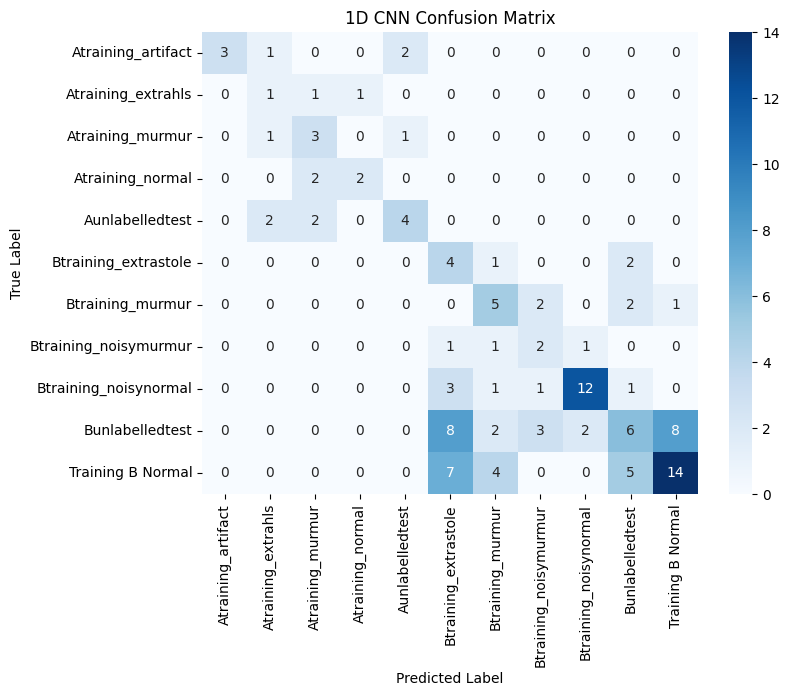

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

X = df_features.drop(['label', 'file'], axis=1).values
y = df_features['label'].values

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.3, random_state=42, stratify=y_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, np.argmax(y_train, axis=1))
y_train_res = to_categorical(y_train_res)

X_train_res = X_train_res[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_res.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_res, y_train_res, validation_data=(X_val, y_val), epochs=50, batch_size=32)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("1D CNN Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Model Validation


Random Forest Evaluation
Accuracy: 0.464

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.33      0.33      0.33         3
           2       0.50      0.60      0.55         5
           3       0.50      0.25      0.33         4
           4       0.40      0.50      0.44         8
           5       0.00      0.00      0.00         7
           6       0.60      0.30      0.40        10
           7       0.00      0.00      0.00         5
           8       0.83      0.56      0.67        18
           9       0.32      0.45      0.37        29
          10       0.47      0.63      0.54        30

    accuracy                           0.46       125
   macro avg       0.43      0.39      0.40       125
weighted avg       0.46      0.46      0.45       125



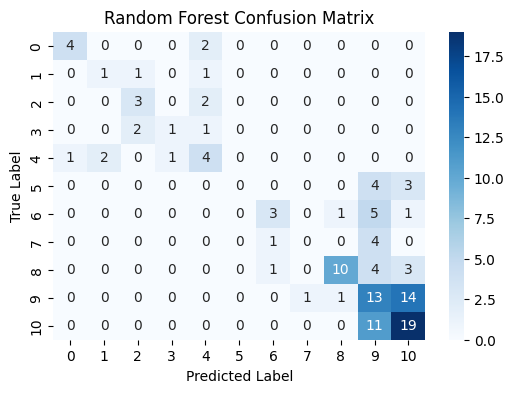

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten features
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, class_weight="balanced", random_state=42)
rf_model.fit(X_train_flat, y_train_flat)

y_pred = rf_model.predict(X_test_flat)

print("Random Forest Evaluation")
print("Accuracy:", round(accuracy_score(y_test_flat, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test_flat, y_pred, zero_division=0))

cm = confusion_matrix(y_test_flat, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion matrix and visualizations


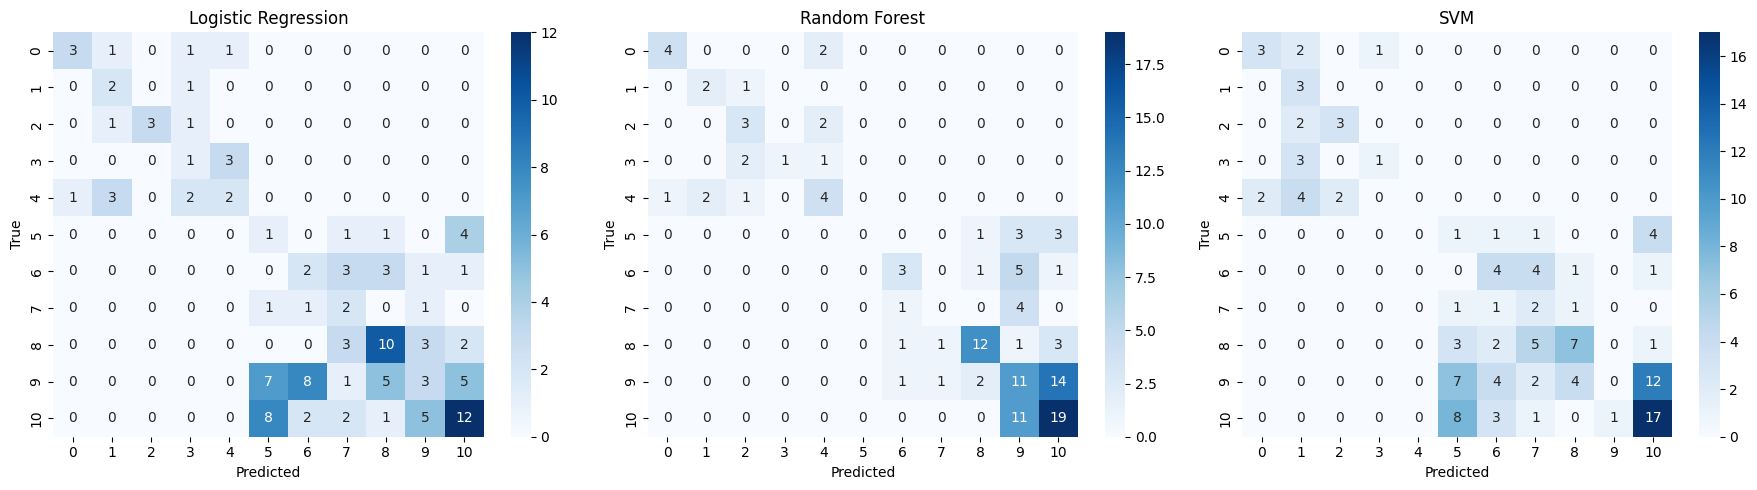

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

X_test_2d = X_test.reshape(X_test.shape[0], -1)

all_models = {
    'Logistic Regression': logistic_regression_model,
    'Random Forest': random_forest_model,
    'SVM': svm_model
}

fig, axes = plt.subplots(1, len(all_models), figsize=(18, 5))

for ax, (name, model) in zip(axes, all_models.items()):
    y_pred = model.predict(X_test_2d)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()